Market Basket Analysis( Apriori algorithm and Association rules)
Market Basket Analysis is like studying a customer's shopping cart to see which items are often bought together.  
Consider yourself in a grocery shop and observing that customers who purchase bread also frequently purchase butter. With the use of MBA, companies can identify these trends and make product recommendations to clients or develop exclusive promotions, such as "Buy bread and get butter at a discount." Knowing what people like to purchase together helps the store sell more goods.

Step 1: Understanding Transactional Data

In [67]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [68]:
df = pd.read_csv(r"C:\Users\Arnab\Downloads\Bread_basket\bread basket.csv")
df.head()

,Transaction,Item,date_time,date,time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,30-10-2016,09:58:00,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,30-10-2016,10:05:00,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,30-10-2016,10:05:00,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,30-10-2016,10:07:00,morning,weekend
4,3,Jam,30-10-2016 10:07,30-10-2016,10:07:00,morning,weekend


2. Data wrangling

In [69]:
#Check the occurrence of null values
df.isna().sum()

Transaction        0
Item               0
date_time          0
date               0
time               0
period_day         0
weekday_weekend    0
dtype: int64

In [70]:
top_10 = (df['Item'].value_counts()).iloc[:10]
top_10

Item
Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Name: count, dtype: int64

<Axes: xlabel='Item'>

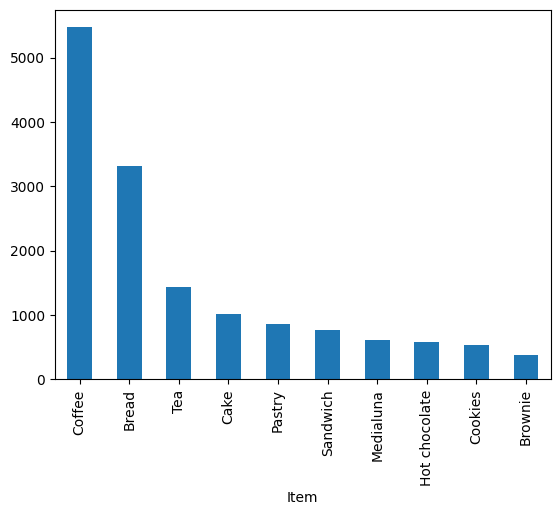

In [71]:
import seaborn as sb
import matplotlib.pyplot as plt
top_10.plot(kind='bar')

In [72]:
#creating a new dataframe
new_df = df[['Transaction','Item']]
new_df

,Transaction,Item
0,1,Bread
1,2,Scandinavian
2,2,Scandinavian
3,3,Hot chocolate
4,3,Jam
...,...,...
20502,9682,Coffee
20503,9682,Tea
20504,9683,Coffee
20505,9683,Pastry


Before applying the Apriori algorithm,we converted the data into a format that the algorithm can work with, which is a one-hot encoded format.

In [73]:
df_onehot = new_df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
df_onehot = df_onehot.applymap(lambda x: 1 if x > 0 else 0)
df_onehot

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
# Convert the DataFrame to boolean type
df_onehot_bool = df_onehot.astype(bool)
df_onehot_bool

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
# Apply the apriori algorithm
frequent_itemsets = apriori(df_onehot_bool, min_support=0.01, max_len = 3,use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(15)

,support,itemsets
6,0.478394,(Coffee)
2,0.327205,(Bread)
26,0.142631,(Tea)
4,0.103856,(Cake)
34,0.090016,"(Coffee, Bread)"
19,0.086107,(Pastry)
21,0.071844,(Sandwich)
16,0.061807,(Medialuna)
12,0.058320,(Hot chocolate)
42,0.054728,"(Coffee, Cake)"


Products like bread,cake,tea,pastry show high support when bundled with coffee. Thus
1. Product Bundling
Strategy: Bundle items frequently bought together at a slight discount
2. Store Layout Optimization
Strategy: Place products that are often bought together near each other in the store
3. Targeted Promotions
Strategy: Offer personalized discounts or coupons for items frequently bought together.


In [76]:
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
38,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
30,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
31,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
14,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
15,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
17,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
16,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
32,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354
33,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907


Key Metrics in Association Rules
Support: The proportion of transactions that contain a particular itemset relative to the total number of transactions. High support indicates frequent co-occurrence of items.

Confidence: The likelihood that a product B is purchased when product A is purchased. This measures the reliability of the rule.

Lift: The ratio of the observed support to that expected if A and B were independent. Lift greater than 1 suggests that A and B are positively correlated, i.e., they are more likely to be bought together than by chance.


In [77]:
assoc_rules.sort_values(["support","confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
0,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
3,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
2,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
5,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
4,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
6,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
7,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
9,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
8,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048


Analysing the frequently bought items 

In [78]:
fixed_consequent = assoc_rules[assoc_rules['antecedents']== {'Coffee'}].copy()
fixed_consequent.sort_values("lift",ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
34,(Coffee),(Spanish Brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682,0.385594
7,(Coffee),(Medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
2,(Coffee),(Pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
22,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
19,(Coffee),(Juice),0.478394,0.038563,0.020602,0.043065,1.116750,0.002154,1.004705,0.200428
4,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
0,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
26,(Coffee),(Scone),0.478394,0.034548,0.018067,0.037765,1.093107,0.001539,1.003343,0.163296
12,(Coffee),(Cookies),0.478394,0.054411,0.028209,0.058966,1.083723,0.002179,1.004841,0.148110


When we fix the antecedents item to coffee both confidence and lift shows a high value implicating this combination occurs 1.47 times more often than would be expected by chance. Items like Spanish Brunch and Alfajores exhibit a notable increase in lift while having extremely low support and confidence. As a result, it is crucial to properly arrange these items to target niche consumers to avoid wasting resources.

In [79]:
fixed_consequent = assoc_rules[assoc_rules['antecedents']== {'Tea'}].copy()
fixed_consequent.sort_values(["lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
28,(Tea),(Sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134,0.334566
40,(Tea),"(Coffee, Cake)",0.142631,0.054728,0.010037,0.070370,1.285822,0.002231,1.016827,0.259266


In [80]:
assoc_rules.sort_values(["support"],axis = 0, ascending = True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
38,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
39,"(Coffee, Cake)",(Tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923,0.235157
37,(Cake),"(Coffee, Bread)",0.103856,0.090016,0.010037,0.096643,1.073621,0.000688,1.007336,0.076520
36,"(Coffee, Bread)",(Cake),0.090016,0.103856,0.010037,0.111502,1.073621,0.000688,1.008606,0.075356
40,(Tea),"(Coffee, Cake)",0.142631,0.054728,0.010037,0.070370,1.285822,0.002231,1.016827,0.259266
34,(Coffee),(Spanish Brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682,0.385594
35,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
33,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907
32,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354


In [81]:
assoc_rules.sort_values("confidence",ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
16,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
35,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
6,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
3,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
23,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
18,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
5,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205
1,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
27,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700


Here’s a typical analysis of the rules generated:

1. High Confidence, High Lift Rules:

Rules with high confidence and lift values indicate strong relationships between items. Referring to the above table we find that the  (Toast)-->(Coffee) combination hold 0.7 confidence and 1.5 lift suggesting 70% of the transactions that include Toast also include Coffee, and this combination occurs 1.5 times more often than would be expected by chance.

Business Implication: store can consider bundling these items together in promotions or placing them near each other in the store.

In [82]:
assoc_rules.sort_values("lift",ascending = True).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
25,(Muffin),(Coffee),0.038457,0.478394,0.018806,0.489011,1.022193,0.000408,1.020777,0.022579
24,(Coffee),(Muffin),0.478394,0.038457,0.018806,0.039311,1.022193,0.000408,1.000888,0.041623
20,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080,0.048327
21,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
11,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980


2. High Confidence but Low Lift 
Demanding Item: If an item has high confidence but low lift, it often means that the consequent item is in high demand generally. This is because the high confidence is driven by the item's overall popularity, not necessarily by a strong association with the antecedent.
In our case (Muffin)-->(Coffee) even though holds high confidence 0.5,the lift is quite low indicating that the sell of coffee is not driven by muffin but of its demand.

Business implication: High confidence but low lift rules may not be actionable for promotions or cross-selling because the items are purchased together simply due to the popularity of the consequent item.

In [83]:
assoc_rules.sort_values("support",ascending = True).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
41,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
38,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
39,"(Coffee, Cake)",(Tea),0.054728,0.142631,0.010037,0.183398,1.285822,0.002231,1.049923,0.235157
37,(Cake),"(Coffee, Bread)",0.103856,0.090016,0.010037,0.096643,1.073621,0.000688,1.007336,0.076520
36,"(Coffee, Bread)",(Cake),0.090016,0.103856,0.010037,0.111502,1.073621,0.000688,1.008606,0.075356
40,(Tea),"(Coffee, Cake)",0.142631,0.054728,0.010037,0.070370,1.285822,0.002231,1.016827,0.259266
34,(Coffee),(Spanish Brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682,0.385594
35,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
33,(Pastry),"(Coffee, Bread)",0.086107,0.090016,0.011199,0.130061,1.444872,0.003448,1.046033,0.336907
32,"(Coffee, Bread)",(Pastry),0.090016,0.086107,0.011199,0.124413,1.444872,0.003448,1.043749,0.338354


3. Low Support but High Lift
Low support but high lift typically indicates that the itemset is relevant to a niche segment of customers. The products involved are not commonly purchased together by the general population, but when they are, the purchase of one strongly influences the purchase of the other. 
For example, (Cake)-->(Tea, Coffee) in above table shows a support of 0.01 but lift 1.9 implicating the itemset holds a strong relationship between the items, even though they do not frequently appear together.
Similarly, (Spanish Brunch)-->(Coffee) itemset offer low support but 0.6 confidence and 1.25 lift.

Business Implication: 
Risk: The low support indicates a risk; the products do not have a broad appeal and may not generate significant sales volume. Any marketing strategy based on these rules should be carefully tested to avoid misallocation of resources.

Reward: The potential reward is high due to the strong association (high lift). Successfully targeting the niche market could lead to high customer satisfaction and loyalty within that segment, even if overall sales volume remains low.